<a href="https://colab.research.google.com/github/E-wave112/ml_proj1/blob/master/tsaindia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Dates  Punjab  Haryana  ...  Mizoram  Nagaland  Tripura
0  02/01/2019   119.9    130.3  ...      1.9       2.2      3.4
1  03/01/2019   121.9    133.5  ...      1.8       2.2      3.6
2  04/01/2019   118.8    128.2  ...      1.7       2.2      3.5
3  05/01/2019   121.0    127.5  ...      1.8       2.3      3.5
4  06/01/2019   121.4    132.6  ...      1.9       2.3      3.3

[5 rows x 34 columns]


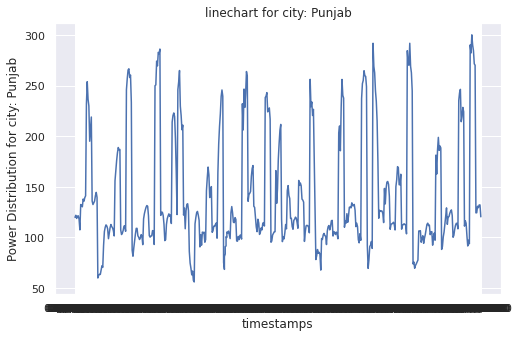

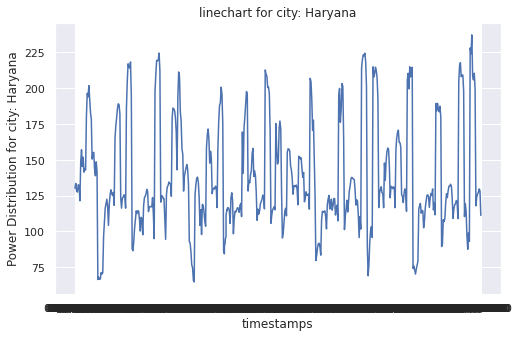

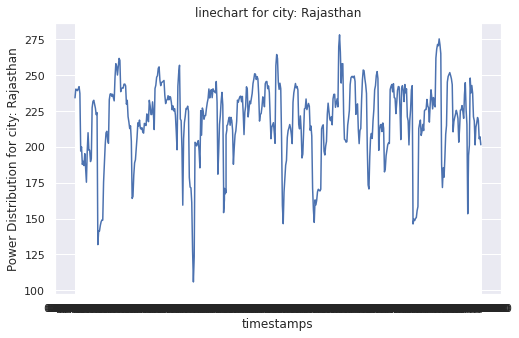

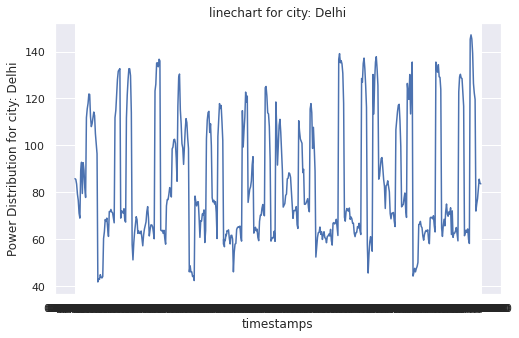

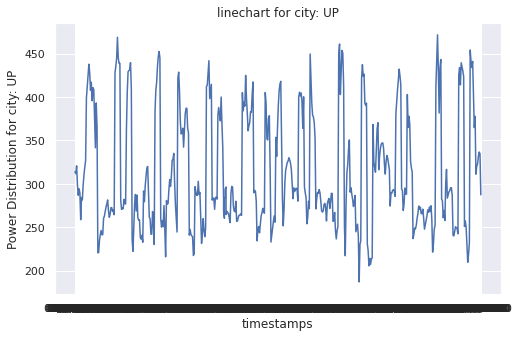

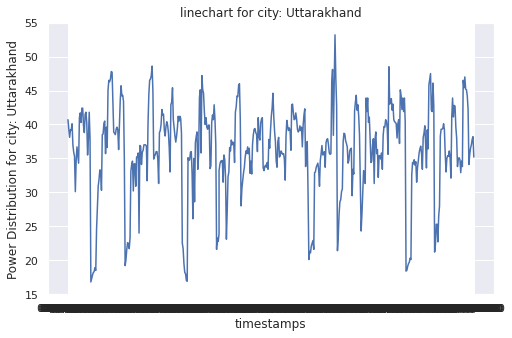

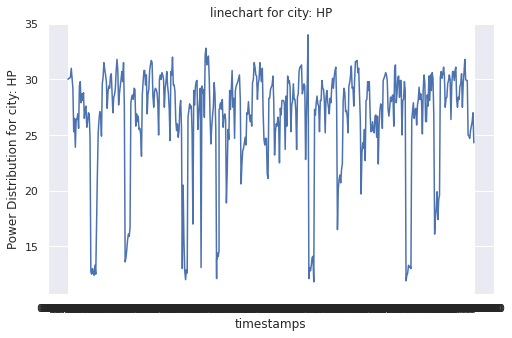

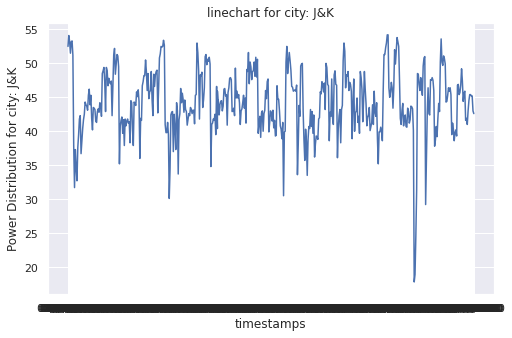

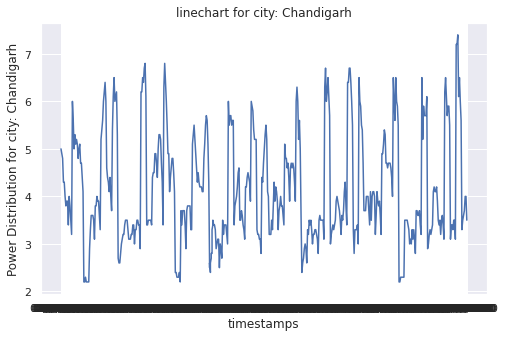

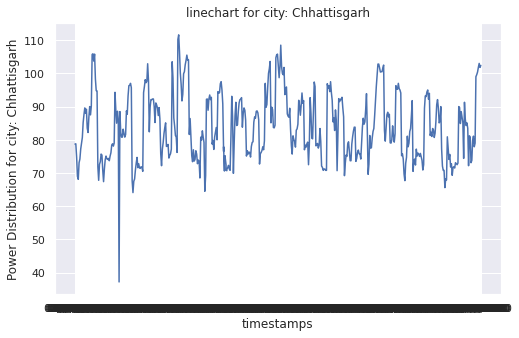

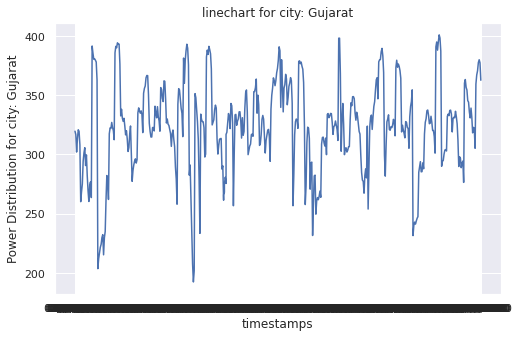

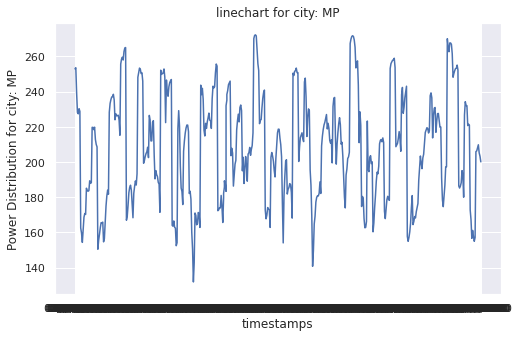

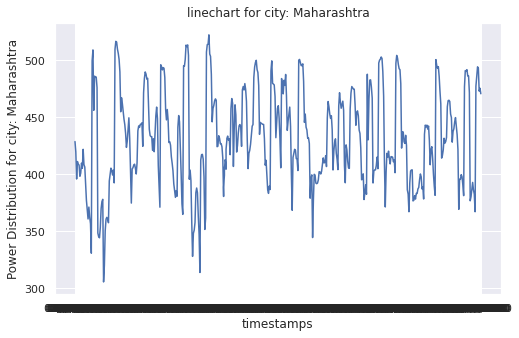

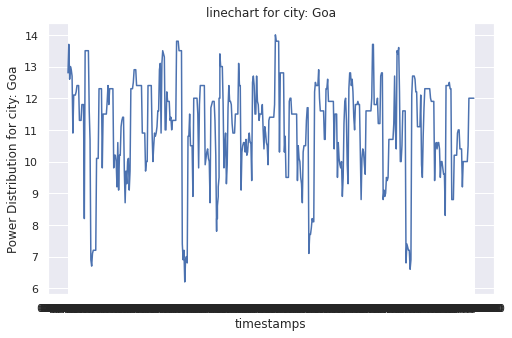

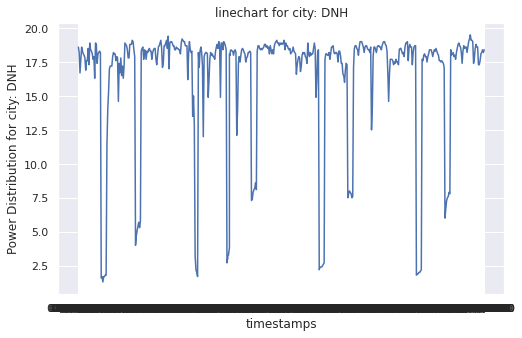

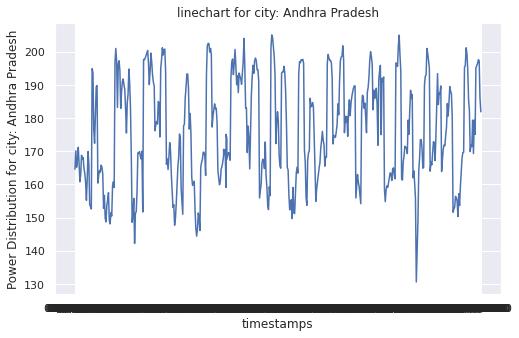

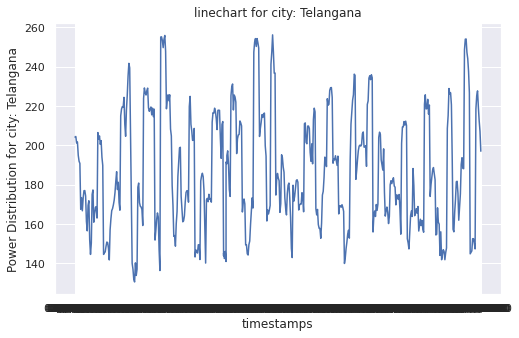

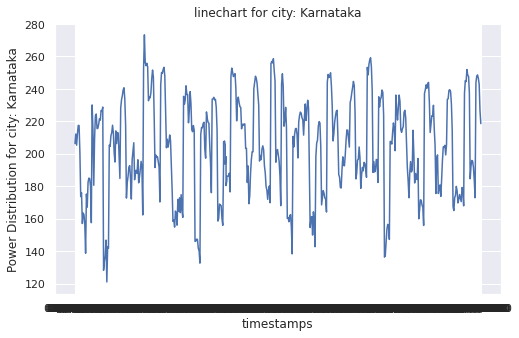

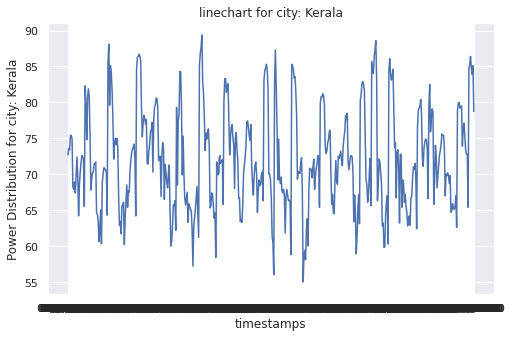

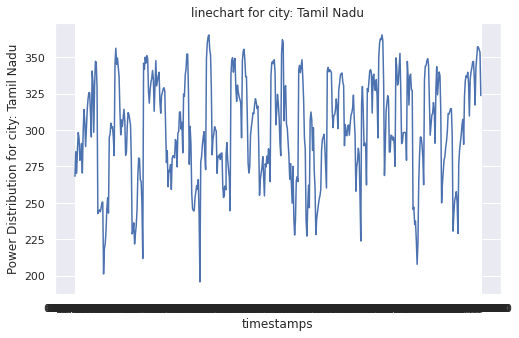

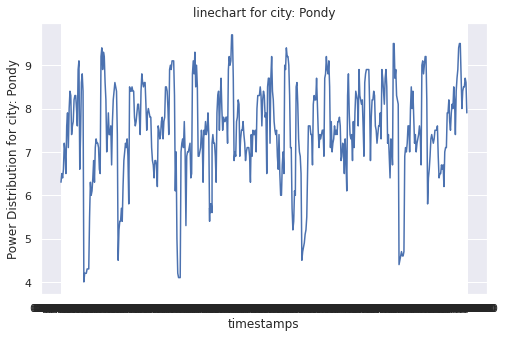

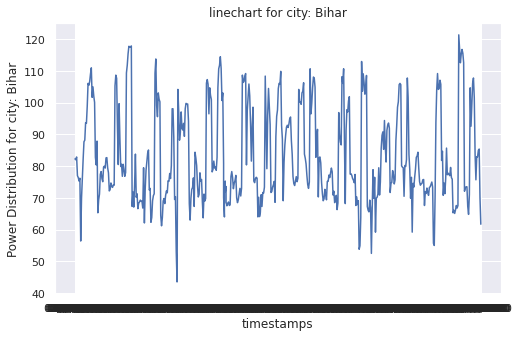

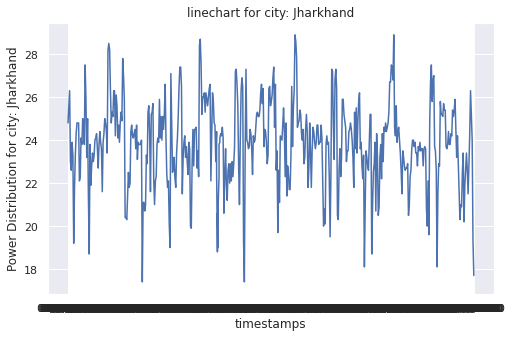

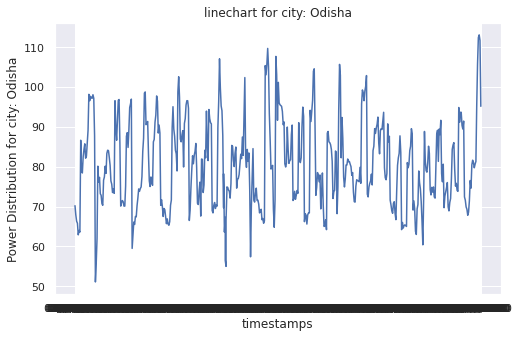

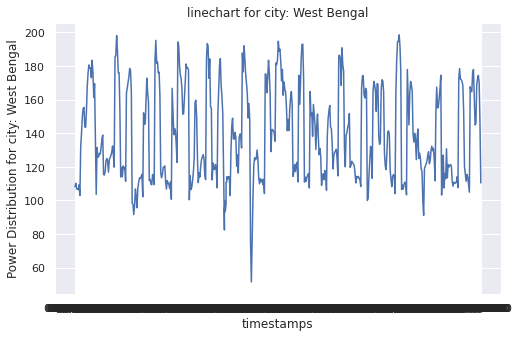

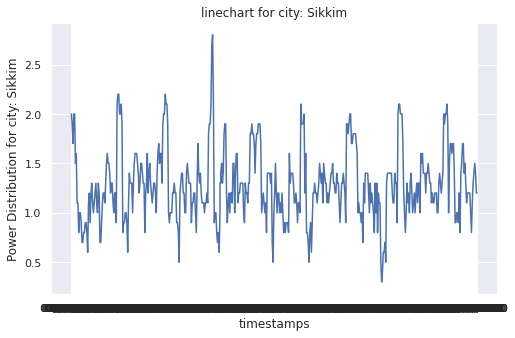

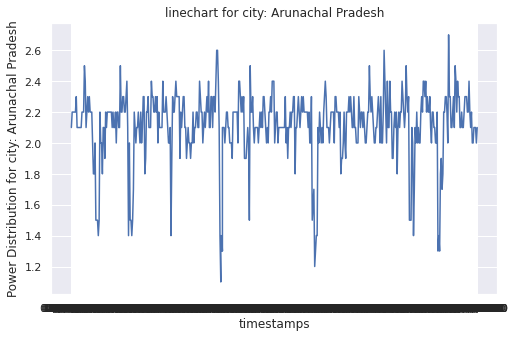

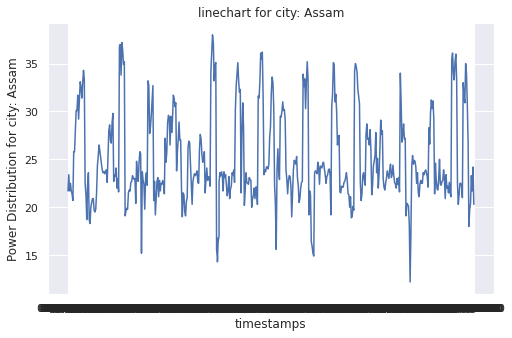

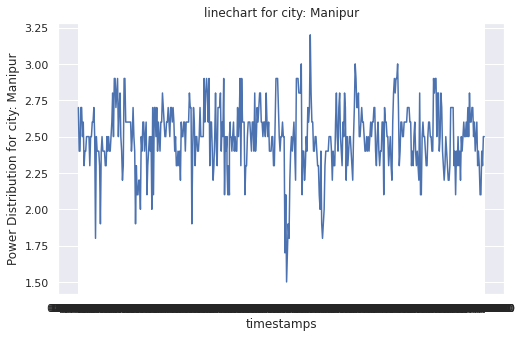

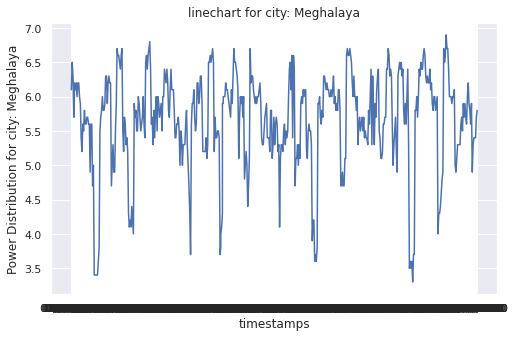

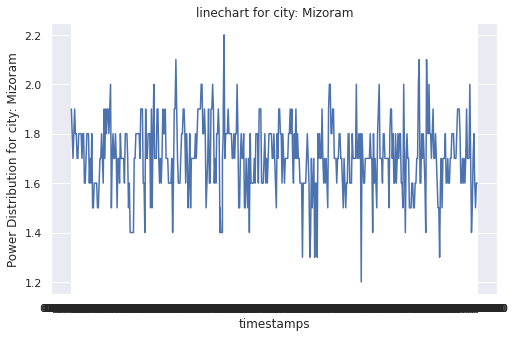

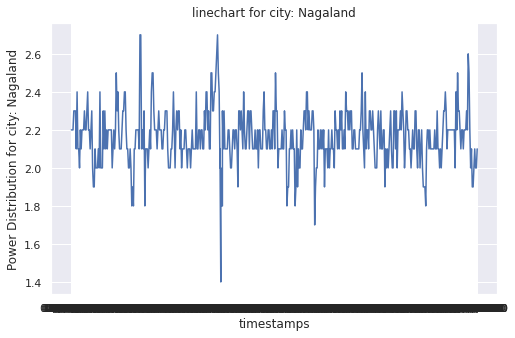

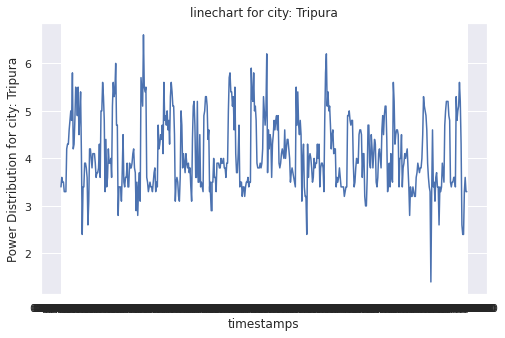


top 10 states with the highest consumption of electricity in the last year are shown below

Maharashtra    522.1
UP             471.8
Gujarat        400.8
Tamil Nadu     365.4
Punjab         300.0
Rajasthan      278.0
Karnataka      273.3
MP             272.3
Telangana      256.2
Haryana        237.2
dtype: float64

the visualization is shown below



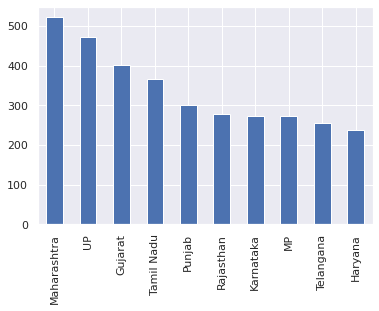


top 10 states with the lowest consumption of electricity in the last  year are shown below

Pondy                4.0
Meghalaya            3.3
Chandigarh           2.2
Manipur              1.5
Nagaland             1.4
Tripura              1.4
DNH                  1.3
Mizoram              1.2
Arunachal Pradesh    1.1
Sikkim               0.3
dtype: float64

the visualization is shown below



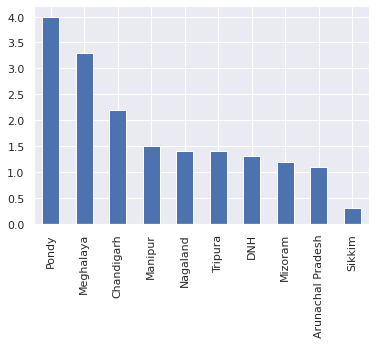

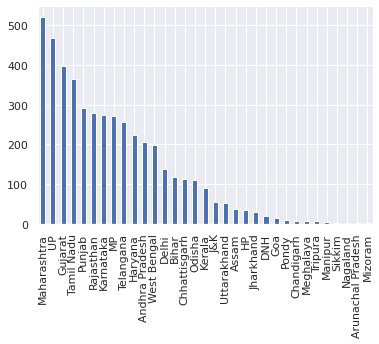

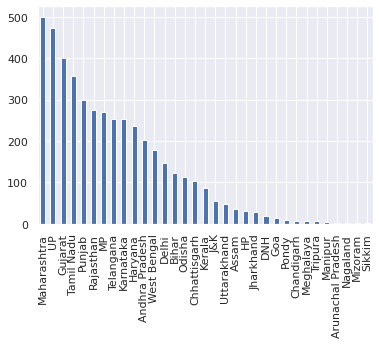



Perason's Correlation coefficient:0.9989517437011775

Spearman's Correlation coefficient:0.9998328597693465

Kendall's Correlation coefficient:0.9981024667931687




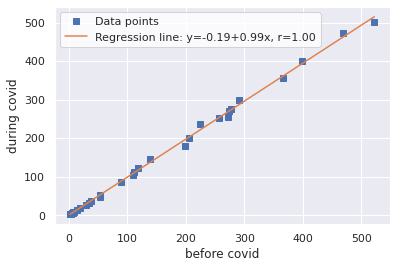

 we can now conclude the effect of the covid-19 and lockdown on power distribution in india was very minimal


In [22]:
##import neccessary modules for eda and visualization
import numpy as np
import pandas as pd
import scipy.stats
from pandas import DataFrame
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')
##using matplotlib as the default style
sns.set()
##A repository that entails the analysis and data insights generated from the changes in power distribution in various indian cities before and during the coronavirus pandemic
##load the data

df = pd.read_csv('/content/drive/MyDrive/tsaindia/dataset_tk.csv')
##set the dateime index
df.rename(columns={'Unnamed: 0':'Dates'},inplace=True)
new_date = []
##replace the hour minutes timestamps and remove all trailing or leading whitespaces
for i in np.array(df['Dates']):
  x = i.replace('00:00:00','')
  x = x.strip()
  new_date.append(x)

df['Dates'] = new_date
##convert the dates column to datetime objects
pd.to_datetime(df['Dates'])
# df['Dates'] = df['Dates'].apply(lambda x: datetime.datetime.strptime(x,'%d/%m/%Y'))
print(df.head())



##drop the dates column
df_states = df.drop(df[['Dates']],axis=1)
##create a loop to iterate through all columns of our dataframe and generate a lineplot for each city so that we can generate insights
# sns.lineplot(data=df,x='Dates',y='Punjab',color='blue'
for i in df_states.columns:
  plt.figure(figsize=(8,5))
  plt.title('linechart for city: {}'.format(i))
  plt.xlabel('timestamps')
  plt.ylabel('Power Distribution for city: {}'.format(i))
  plt.plot(df['Dates'],df_states[i])
  plt.show()
print('='*150)
##calculate the states which consumes the highest source of electricity
print('\ntop 10 states with the highest consumption of electricity in the last year are shown below\n')
df_power_max = df_states.max().sort_values(ascending=False)[:10]
print(df_power_max)
print('\nthe visualization is shown below\n')
##create a barplot
df_power_max.plot.bar()
plt.show()

##calculate the states which consumes the lowest source of electricity
print("="*150)
print('\ntop 10 states with the lowest consumption of electricity in the last  year are shown below\n')
df_power_min = df_states.min().sort_values(ascending=False)[-10:]
print(df_power_min)
print('\nthe visualization is shown below\n')
##create a barplot
df_power_min.plot.bar()
plt.show()

print("="*100)
##compare the inferential statistics of power usage before and after lockdown
df.drop(df[['Dates']],1,inplace=True)
df_before_lock = df.iloc[:421]
df_during_after_lock = df.iloc[421:]

##checkout the distribution power consumption before covid
df_before_max = df_before_lock.max().sort_values(ascending=False)
##store the numerical values and store them in an numpy array(we will use the array to compute the various correlation coefficients)
array_before_max = np.array([i for i in df_before_max])
##generate a barplot
df_before_max.plot.bar()
plt.show()

print('\n\n\n')
print("="*100)
##checkout the distribution of power consumption during covid and lockdown
df_during_max = df_during_after_lock.max().sort_values(ascending=False)
##store the numerical values and store them in an numpy array(we will use the array to compute the various correlation coefficients)
array_during_max = np.array([i for i in df_during_max])
df_during_max.plot.bar()
plt.show()

##compute the various correlation coefficients for our arrays so that we can check for any relationships
pearson_corr = scipy.stats.pearsonr(array_before_max,array_during_max)[0]
spearman_corr = scipy.stats.spearmanr(array_before_max,array_during_max)[0]
kendall_corr = scipy.stats.kendalltau(array_before_max,array_during_max)[0]

print(f"\n\nPerason\'s Correlation coefficient:{pearson_corr}\n")
print(f"Spearman\'s Correlation coefficient:{spearman_corr}\n")
print(f"Kendall\'s Correlation coefficient:{kendall_corr}\n\n")

##visualize these coefficients
slope, intercept, r, p, stderr = scipy.stats.linregress(array_before_max, array_during_max)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig, ax = plt.subplots()
ax.plot(array_before_max, array_during_max, linewidth=0, marker='s', label='Data points')
ax.plot(array_before_max, intercept + slope * array_before_max, label=line)
ax.set_xlabel('before covid')
ax.set_ylabel('during covid')
ax.legend(facecolor='white')
plt.show()
print(' we can now conclude the effect of the covid-19 and lockdown on power distribution in india was very minimal')

In [ ]:
import pandas as pd
from pandas import DataFrame

dt = pd.DataFrame({'x':[1,2,3,4],'y':[10,-30,90,100]})
for i in dt.columns:
  print(i)
print(dt.y.max())